In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [3]:

df  =pd.read_csv('Insurance.csv')

df.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:

df['sex'] = df['sex'].map({'male': 1, 'female': 0})


In [5]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<Axes: xlabel='bmi', ylabel='Count'>

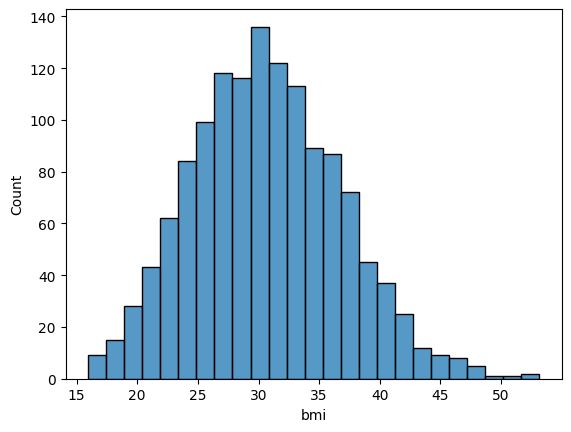

In [6]:

# df['bmi'] = math.ceil(df['bmi'])

sns.histplot(df['bmi'])


In [7]:

import math

df[df['bmi'] >= 30].value_counts()


age  sex  bmi     children  smoker  region     charges    
19   1    30.590  0         no      northwest  1639.56310     2
18   0    30.305  0         no      northeast  2203.73595     1
64   1    40.480  0         no      southeast  13831.11520    1
     0    30.115  3         no      northwest  16455.70785    1
18   0    31.130  0         no      southeast  1621.88270     1
                                                             ..
64   1    36.960  2         yes     southeast  49577.66240    1
          37.905  0         no      northwest  14210.53595    1
          38.190  0         no      northeast  14410.93210    1
          39.160  1         no      southeast  14418.28040    1
63   1    41.470  0         no      southeast  13405.39030    1
Name: count, Length: 706, dtype: int64

In [8]:
df.shape

(1338, 7)

In [9]:

df[(df['bmi'] >= 15) & (df['bmi'] <= 20)].shape
# But according to histplot values are 20 - 25


(41, 7)

In [10]:

df[(df['bmi'] == 30)].shape


(2, 7)

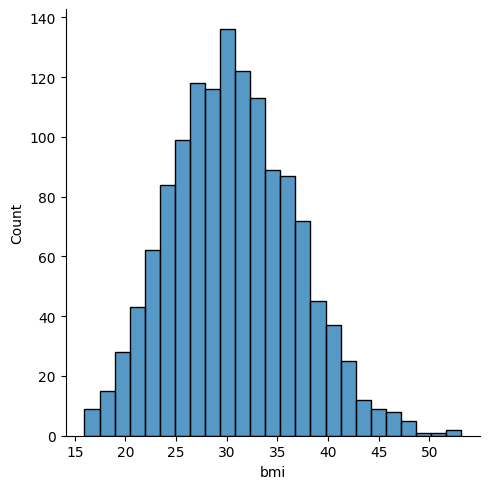

In [11]:
sns.displot(df['bmi'])

C:\Users\user\AppData\Local\Temp\ipykernel_4552\1102081755.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df['bmi'] , bins=1000 , kde = True)


<Axes: xlabel='bmi', ylabel='Density'>

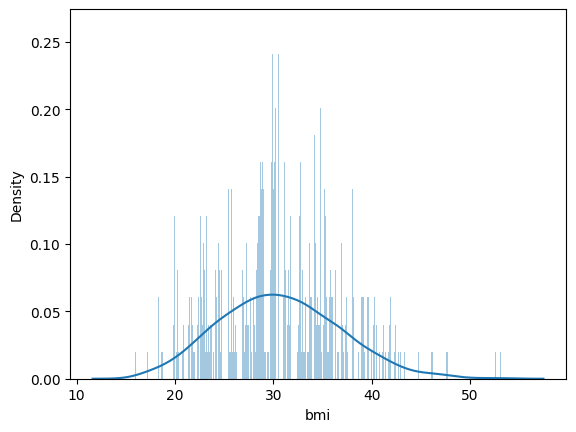

In [12]:

sns.distplot( df['bmi'] , bins=1000 , kde = True)


C:\Users\user\AppData\Local\Temp\ipykernel_4552\628244703.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df['bmi'] , bins=250 , kde = True)


<Axes: xlabel='bmi', ylabel='Density'>

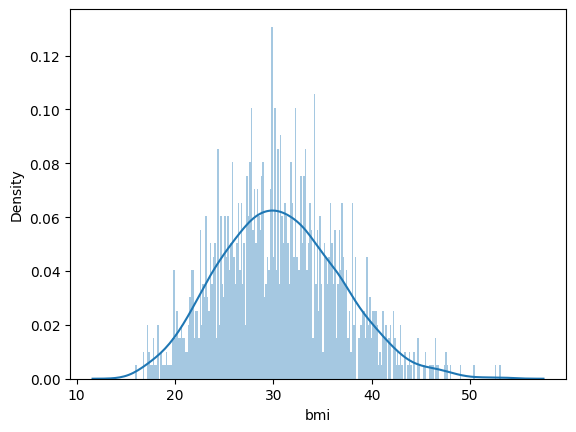

In [13]:
sns.distplot( df['bmi'] , bins=250 , kde = True)

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


<Axes: xlabel='smoker', ylabel='count'>

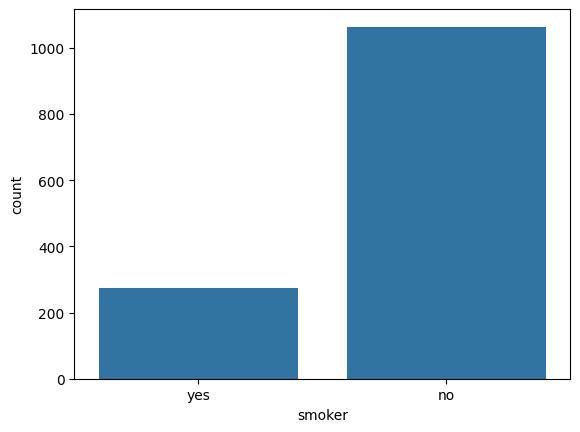

In [15]:
sns.countplot(x = df['smoker'] )

In [16]:
df.shape

(1338, 7)

In [17]:
df[df['smoker'] == 'no'].shape

(1064, 7)

In [18]:
df[df['smoker'] == 'yes'].shape

(274, 7)

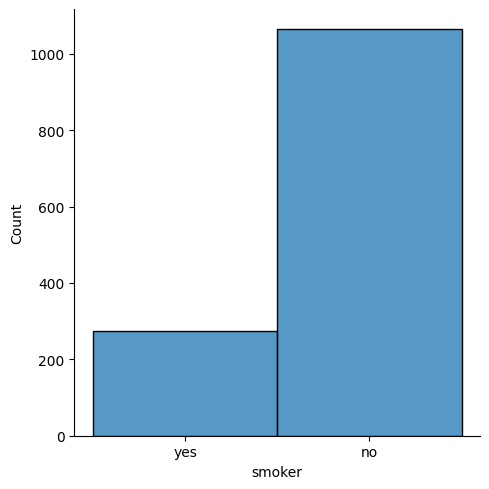

In [19]:
sns.displot( df['smoker'] )

C:\Users\user\AppData\Local\Temp\ipykernel_4552\201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


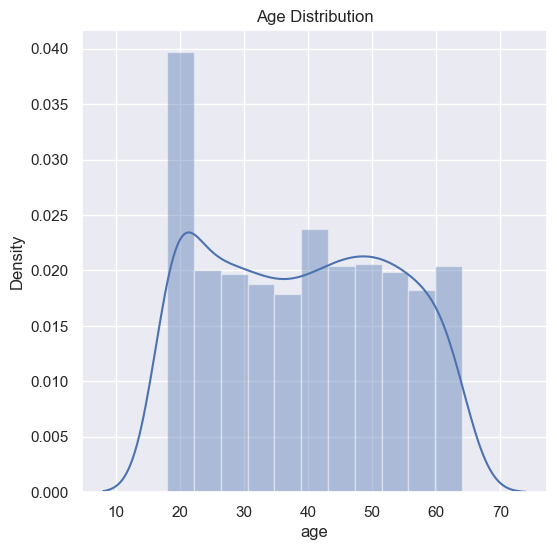

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [21]:

df[(df['age'] >= 10) & (df['age'] <= 20) & (df['smoker'] == 'yes')].shape


(39, 7)

In [22]:

df[(df['age'] <= 20) & ( df['sex'] == 0)  & (df['smoker'] == 'yes') ].shape


(17, 7)

In [23]:

df[(df['age'] >= 30) & (df['age'] <= 40) & (df['smoker'] == 'yes')].shape


(63, 7)

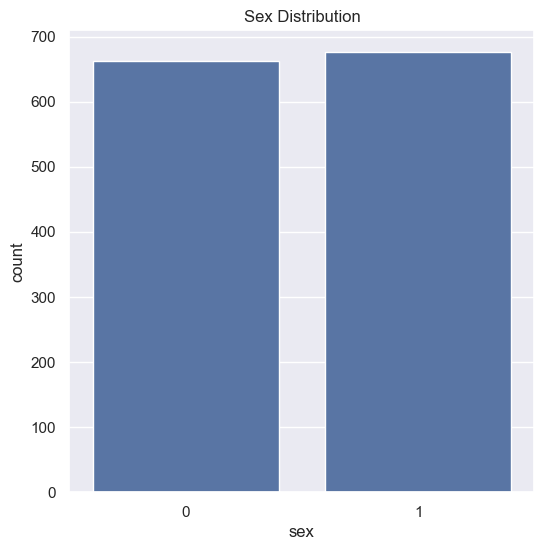

In [24]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [25]:

df[(df['sex'] == 0) & (df['smoker'] == 'yes')].shape


(115, 7)

In [26]:

df[(df['sex'] == 1) & (df['smoker'] == 'yes')].shape


(159, 7)

C:\Users\user\AppData\Local\Temp\ipykernel_4552\2778200837.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


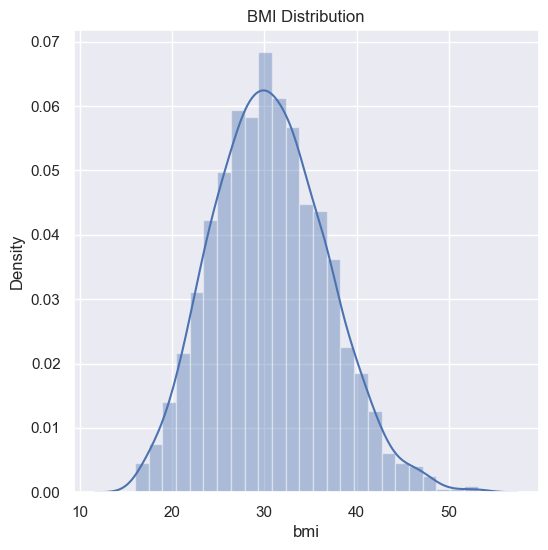

In [27]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

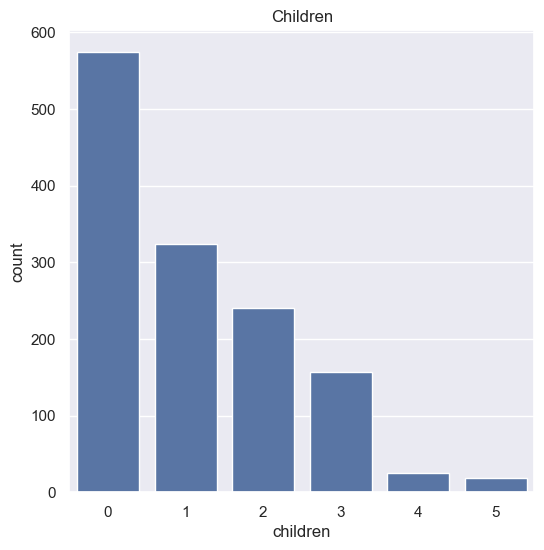

In [28]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [29]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

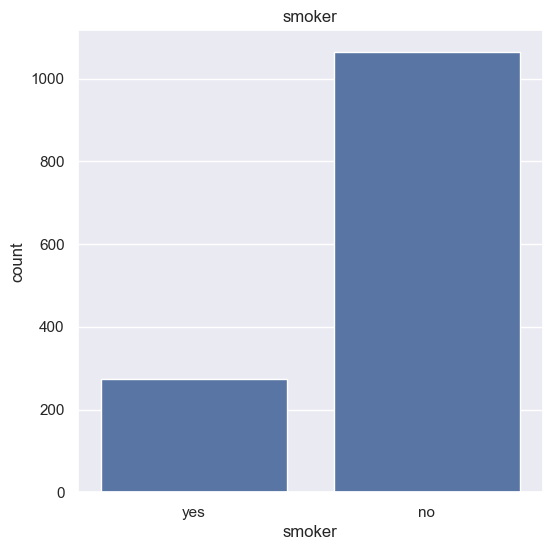

In [30]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

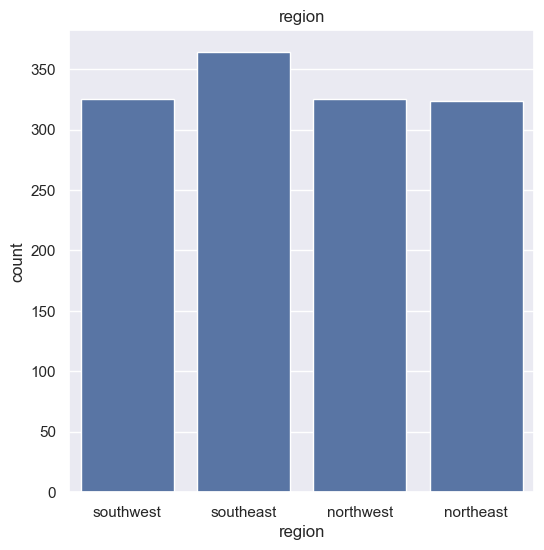

In [31]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4552\3605754450.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


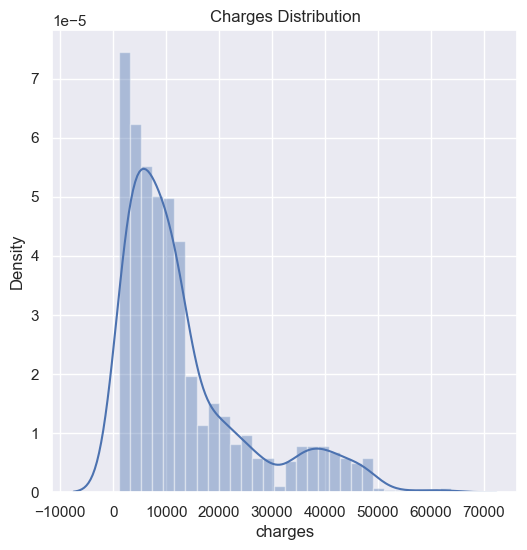

In [32]:

plt.figure(figsize=(6,6))

sns.distplot(df['charges'])

plt.title('Charges Distribution')
plt.show()

In [33]:
mx = max(df['charges'])

fil = df[(df['charges'] > 40000) & (df['charges'] <= mx) & (df['sex'] == 0) & (df['smoker'] == 'yes')]


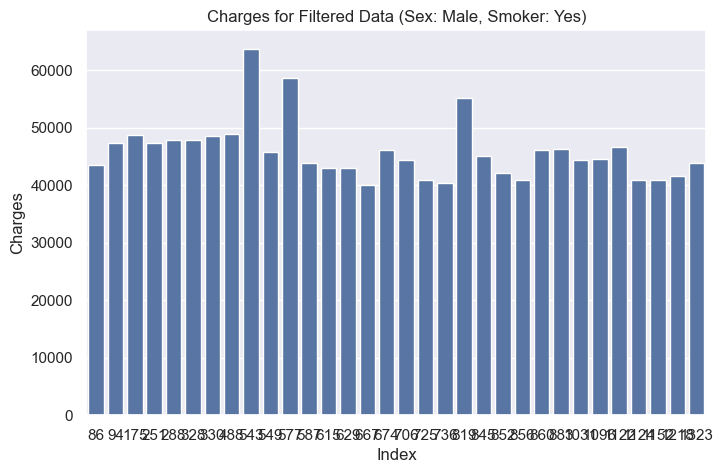

In [34]:
plt.figure(figsize=(8, 5))
sns.barplot(x=fil.index, y='charges', data=fil )
plt.title('Charges for Filtered Data (Sex: Male, Smoker: Yes)')
plt.xlabel('Index')
plt.ylabel('Charges')
plt.show()

In [35]:
mx = min(df['charges'])
df[( df['charges']  == mx )  & (df['smoker'] == 'no') ]

,age,sex,bmi,children,smoker,region,charges
940,18,1,23.21,0,no,southeast,1121.8739


In [36]:
nf = df[(df['charges'] >= 1000) & (df['charges'] <= 5000) & (df['sex'] == 0) & (df['smoker'] == 'yes')]

In [37]:
nf

,age,sex,bmi,children,smoker,region,charges


In [38]:
min_value = df[df['smoker'] == 'yes']['charges'].min()

In [39]:

df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4552\2678048283.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':1,'no':0}}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4552\2678048283.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [40]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [41]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

<Axes: ylabel='charges'>

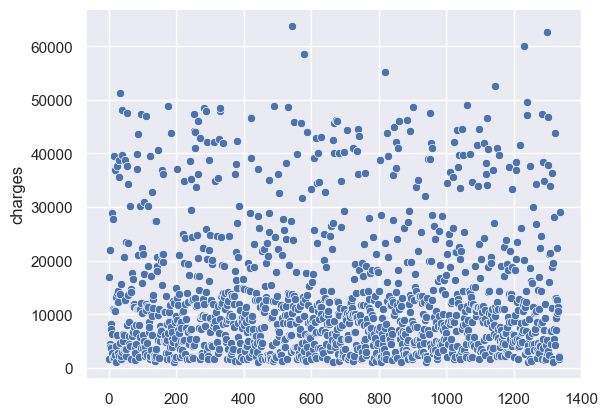

In [42]:
sns.scatterplot(df['charges'])

<Axes: xlabel='smoker', ylabel='charges'>

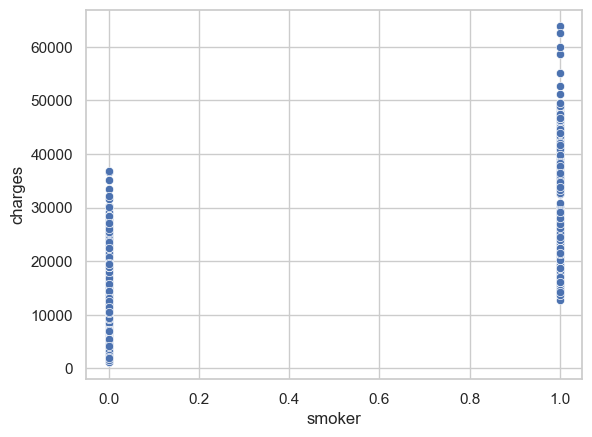

In [44]:
sns.scatterplot(y= df['charges'] , x= df['smoker']  )

In [45]:

df[ df['smoker'] == 0].max()


age            64.00000
sex             1.00000
bmi            53.13000
children        5.00000
smoker          0.00000
region          3.00000
charges     36910.60803
dtype: float64

In [46]:
df[ df['smoker'] == 0].min()

age           18.0000
sex            0.0000
bmi           15.9600
children       0.0000
smoker         0.0000
region         0.0000
charges     1121.8739
dtype: float64

In [47]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


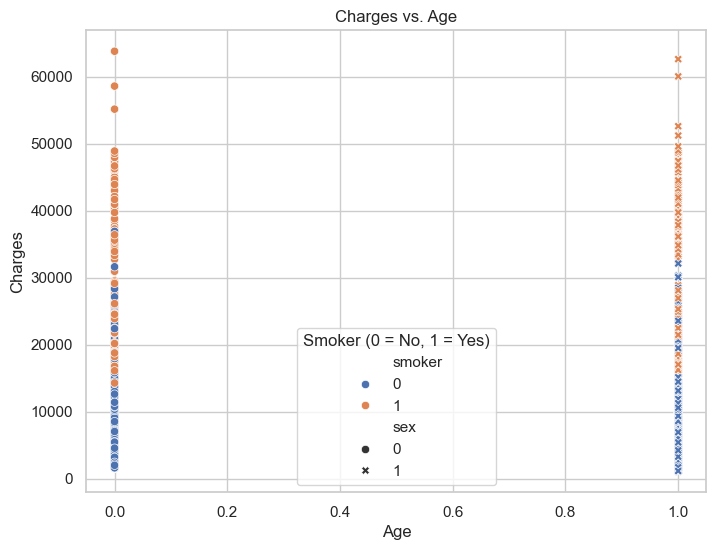

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sex', y='charges', data=df, hue='smoker', style='sex')
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker (0 = No, 1 = Yes)')
plt.show()


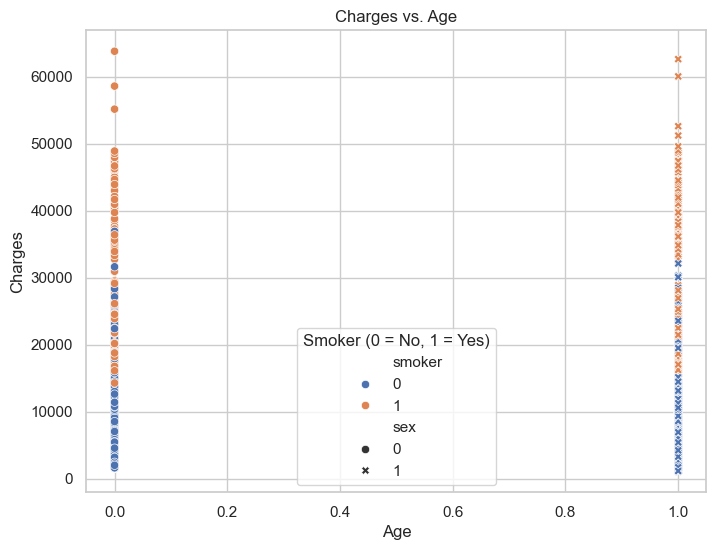

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sex', y='charges', data=df, hue='smoker', style='sex')
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker (0 = No, 1 = Yes)')
plt.show()


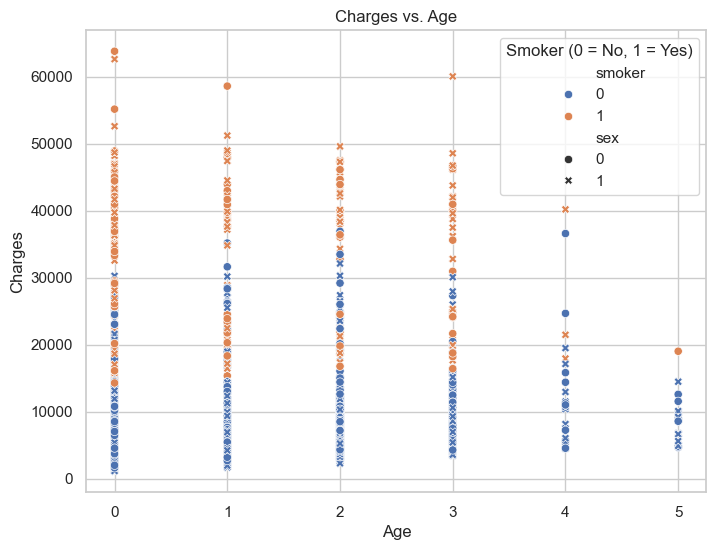

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='children', y='charges', data=df, hue='smoker', style='sex')
plt.title('Charges vs. Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker (0 = No, 1 = Yes)')
plt.show()


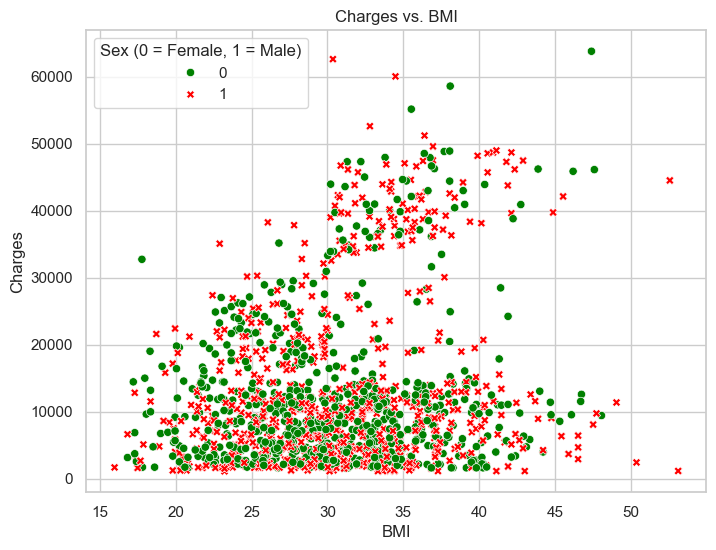

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df, 
                hue='sex', 
                palette={0: 'green', 1: 'red'},
                style='sex',  # Use style to differentiate markers
                markers={0: 'o', 1: 'X'})  # Circle for female (0), Cross for male (1)

plt.title('Charges vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Sex (0 = Female, 1 = Male)')
plt.show()

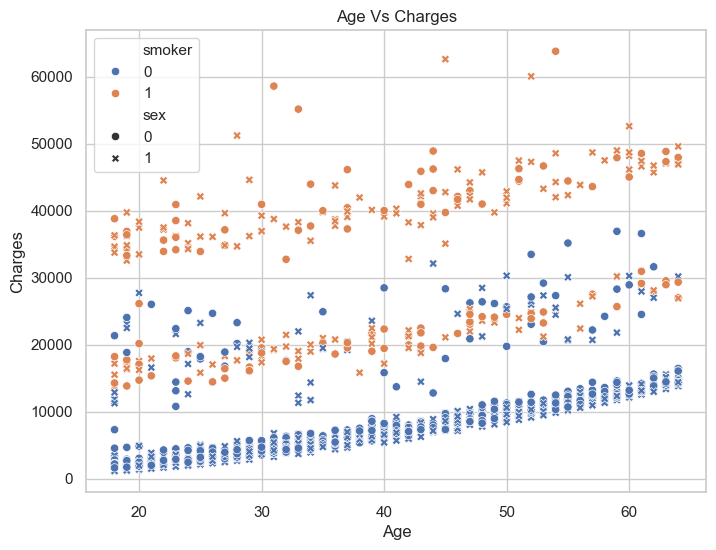

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', style='sex')
plt.title('Age Vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


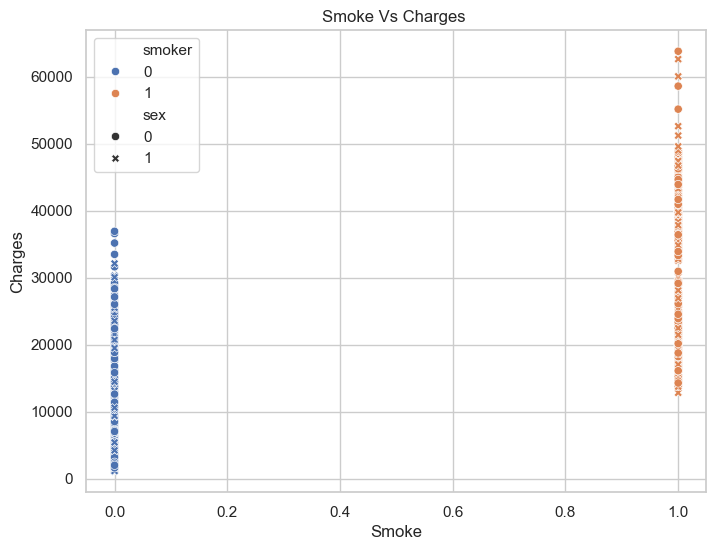

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='smoker', y='charges', data=df, hue='smoker', style='sex')
plt.title('Smoke Vs Charges ')
plt.xlabel('Smoke')
plt.ylabel('Charges')
plt.show()


In [54]:
max_charges = df['charges'].max()

# Filter the DataFrame to get the row(s) with the maximum charges
max_charges_row = df[df['charges'] == max_charges]


In [55]:
max_charges_row 

,age,sex,bmi,children,smoker,region,charges
543,54,0,47.41,0,1,0,63770.42801


In [56]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [58]:
df.dtypes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

<h1>Here DecisionTreeRegressor Giving Acc 100%</h1>

In [59]:

model = RandomForestRegressor()

In [60]:

model.fit(X_train,Y_train)

y_pred = model.predict(X_test)
y_pred_test = model.predict(X_train)


In [61]:
s = metrics.r2_score(Y_test , y_pred)

In [62]:
s

0.8424295847743406

In [63]:

r2_train = metrics.r2_score(Y_train , y_pred_test)

print('R squared vale : ', r2_train)


R squared vale :  0.9771369616412738


In [64]:
input_data = (19,	0	,27.900,	0	,1	,1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

print(prediction)

print('The insurance cost is USD ', prediction[0])


[16942.1972685]
The insurance cost is USD  16942.19726850003


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [65]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,0,31.920,0,0,2,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [66]:
import pickle 

In [67]:
pickle.dump(model , open('model.pkl' , 'wb'))